In [1]:
from heatmap import to_heatmap
from heatmap import synset_to_dfs_ids
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.resnet50 import ResNet50
from keras.applications.inception_v3 import InceptionV3

from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.models import model_from_json

Using Theano backend.
Using gpu device 0: GeForce GTX 970 (CNMeM is enabled with initial size: 80.0% of memory, cuDNN 5105)


In [5]:
def display_heatmap(new_model, img_path):

    plt.figure()
    img=mpimg.imread(img_path)
    plt.subplot(121)
    plt.imshow(img)
    
    img = image.load_img(img_path)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    out = new_model.predict(x)

    s = "n02512053" # Imagenet code for "fish"
    ids = synset_to_dfs_ids(s)
    heatmap_fish = out[0,ids].sum(axis=0)
    plt.subplot(122)
    plt.imshow(heatmap_fish, interpolation="none")
    plt.show()

## Let's try with a VGG16:

In [3]:
model = VGG16()
new_model = to_heatmap(model)

Model type detected: local pooling - flatten
Model cut at layer: 18
yolo
Pool size infered: 7
New convolution size: 13
[7, 7]
insert_zeros=1
[[  2.67237029e-03  -2.90572015e-03   3.51020659e-04 ...,  -7.45343743e-04
    1.10182700e-05   6.67527143e-04]
 [ -1.82259269e-03  -5.75809646e-03   8.28330754e-04 ...,   3.03061306e-03
   -6.47103006e-04   1.82665605e-03]]
[1, 1]
[1, 1]
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_2 (InputLayer)             (None, 3, None, None) 0                                            
____________________________________________________________________________________________________
model_1 (Model)                  multiple              14714688    input_2[0][0]                    
____________________________________________________________________________________________________
block5_pool (M

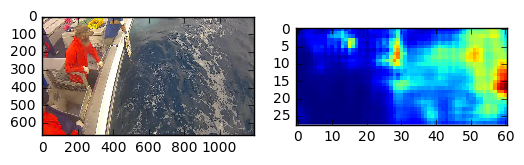

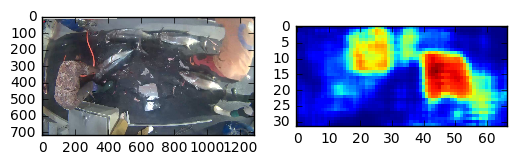

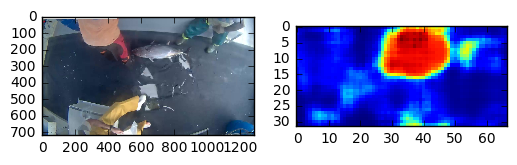

In [4]:
display_heatmap(new_model, "./train/ALB/img_00110.jpg")
display_heatmap(new_model, "./train/ALB/img_00003.jpg")
display_heatmap(new_model, "./train/ALB/img_00085.jpg")

## Now with a ResNet50:

In [3]:
model = ResNet50()
new_model = to_heatmap(model)

Model type detected: local pooling - flatten
Model cut at layer: 174
Pool size infered: 1


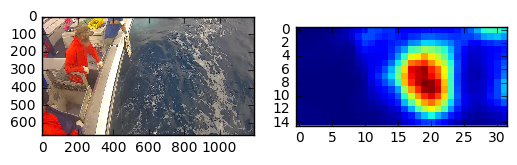

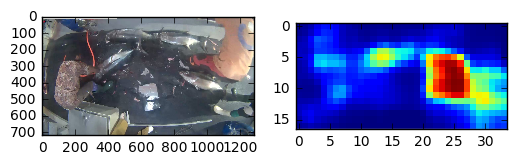

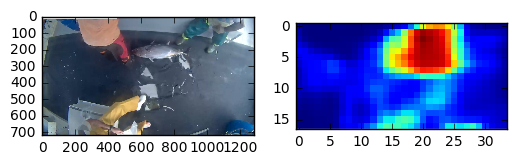

1.494462013244629


In [6]:
import time
t = time.time()
display_heatmap(new_model, "./train/ALB/img_00110.jpg")
display_heatmap(new_model, "./train/ALB/img_00003.jpg")
display_heatmap(new_model, "./train/ALB/img_00085.jpg")
print(time.time()-t)

## Now with a custom classifier:

Class 0 is "fish" and class 1 is "no fish"

In [3]:
# load json and create model
json_file = open('model_2c_10e_R50_1.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
# load weights into new model
model.load_weights("model_2c_10e_R50_1.h5")
print("Loaded model from disk")

ValueError: You are trying to load a weight file containing 109 layers into a model with 3 layers.

In [4]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_2 (InputLayer)             (None, 3, None, None) 0                                            
____________________________________________________________________________________________________
zeropadding2d_2 (ZeroPadding2D)  (None, 3, None, None) 0           input_2[0][0]                    
____________________________________________________________________________________________________
conv1 (Convolution2D)            (None, 64, None, None 0           zeropadding2d_2[0][0]            
____________________________________________________________________________________________________
bn_conv1 (BatchNormalization)    (None, 64, None, None 0           conv1[0][0]                      
___________________________________________________________________________________________

In [19]:
new_model = to_heatmap(model, input_shape=(3,256,256))

Model type detected: local pooling - global pooling (same type)
Model cut at layer: 174
Pool size infered: 7


In [20]:
def display_heatmap(new_model, img_path):

    plt.figure()
    img=mpimg.imread(img_path)
    plt.subplot(121)
    plt.imshow(img)
    
    img = image.load_img(img_path)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    #x = preprocess_input(x)

    out = new_model.predict(x)

    heatmap_fish = out[0,[0]].sum(axis=0)
    plt.subplot(122)
    plt.imshow(heatmap_fish, interpolation="none")
    plt.show()

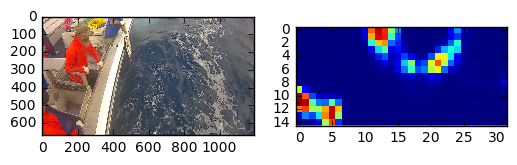

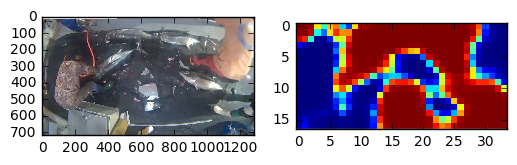

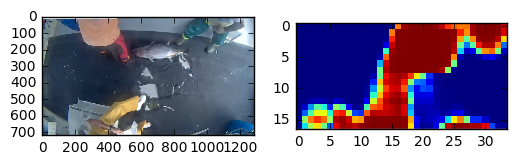

In [21]:
display_heatmap(new_model, "./train/ALB/img_00110.jpg")
display_heatmap(new_model, "./train/ALB/img_00003.jpg")
display_heatmap(new_model, "./train/ALB/img_00085.jpg")

## Now with the InceptionV3:

It's buggy and I don't know why. If someone could figure it out, it'd be great.

In [22]:
model = InceptionV3()
new_model = to_heatmap(model)

Model type detected: local pooling - flatten
Model cut at layer: 217
Pool size infered: 1
New convolution size: 1


In [ ]:
def display_heatmap(new_model, img_path):

    plt.figure()
    img=mpimg.imread(img_path)
    plt.subplot(121)
    plt.imshow(img)
    
    img = image.load_img(img_path)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    out = new_model.predict(x)

    s = "n02512053" # Imagenet code for "fish"
    ids = synset_to_dfs_ids(s)
    heatmap_fish = out[0,ids].sum(axis=0)
    plt.subplot(122)
    plt.imshow(heatmap_fish, interpolation="none")
    plt.show()

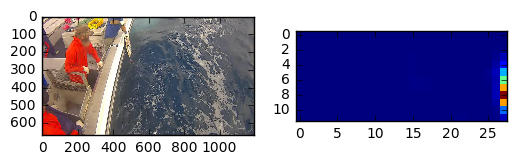

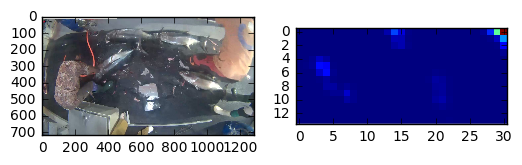

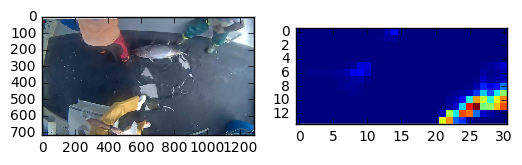

In [24]:
display_heatmap(new_model, "./train/ALB/img_00110.jpg")
display_heatmap(new_model, "./train/ALB/img_00003.jpg")
display_heatmap(new_model, "./train/ALB/img_00085.jpg")

Don't hesitate to contribute!